# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [52]:
# After inspecting the original dataset link I believe 
# First: area A, 
# Second: perimeter P, 
# Third: compactness C = 4*pi*A/P^2, 
# Fourth: length of kernel,
# Fifth: width of kernel,
# Six: asymmetry coefficient
# Seven: length of kernel groove.
# 8 == our target vector 

file_path = 'seeds_dataset.txt'

# column names after inspecting the original dataset 
column_names = ['area', 'perimeter', 'compactness', 'lengthKernel', 'width', 'asymmetry', 'lengthGroove', 'type']

df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

# Display the DataFrame
print(df)

      area  perimeter  compactness  lengthKernel  width  asymmetry  \
0    15.26      14.84       0.8710         5.763  3.312      2.221   
1    14.88      14.57       0.8811         5.554  3.333      1.018   
2    14.29      14.09       0.9050         5.291  3.337      2.699   
3    13.84      13.94       0.8955         5.324  3.379      2.259   
4    16.14      14.99       0.9034         5.658  3.562      1.355   
..     ...        ...          ...           ...    ...        ...   
205  12.19      13.20       0.8783         5.137  2.981      3.631   
206  11.23      12.88       0.8511         5.140  2.795      4.325   
207  13.20      13.66       0.8883         5.236  3.232      8.315   
208  11.84      13.21       0.8521         5.175  2.836      3.598   
209  12.30      13.34       0.8684         5.243  2.974      5.637   

     lengthGroove  type  
0           5.220     1  
1           4.956     1  
2           4.825     1  
3           4.805     1  
4           5.175     1  
.. 

Next, you will need to separate the data into your feature matrix and target vector.

In [14]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
y = df['type']
X = df.drop('type', axis=1)

print("y Shape: {0}".format(y.shape))
print("X Shape: {0}".format(X.shape))

y Shape: (210,)
X Shape: (210, 7)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

I will start with the StandardScaler to see if that is appropriate for the dataset because it gives a mean of zero and variance of one, so seems like a safe spot to start. 

Before we implement the scaler, we need to split the data into training and testing sets first.

In [16]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# TODO: Print the shape of the training feature matrix and target vector
print("X train Shape: {0}".format(X_train.shape))
print("y train Shape: {0}".format(y_train.shape))

X train Shape: (168, 7)
y train Shape: (168,)


Now that we have our training data, we can implement our selected scaler.

In [21]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.fit_transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [24]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=1000) # I set a max iteration because it was giving me an error otherwise 
# model.fit(X_train, y_train)

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [26]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [49]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5) # , scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Cross Validation Score: {:.5f}".format(grid_search.best_score_)) 

test_score = grid_search.score(X_test_scaled, y_test)

print("Test Score: {:.5f}".format(test_score))

Best Parameters:  {'C': 10.0, 'fit_intercept': True}
Best Cross Validation Score: 0.94670
Test Score: 0.95238


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [32]:
# TODO: Predict y labels using best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [50]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  

# Fit the model on the training data and transform the test data
X_test_reduced = pca.fit_transform(X_test)

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(X_test_scaled)
print(X_test_scaled.shape)
print(projected.shape)

(42, 7)
(42, 2)


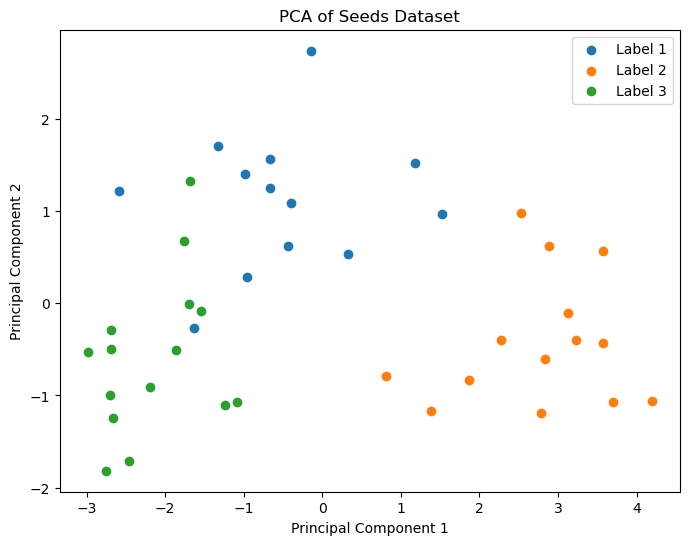

In [51]:
plt.figure(figsize=(8, 6))
for label in np.unique(y_pred):
    indices = np.where(y_pred == label)
    plt.scatter(projected[indices, 0], projected[indices, 1], label=f'Label {label}')

plt.title('PCA of Seeds Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
2. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

Answer Q1: I do believe the logistic regression model worked very well for the dataset given the high accuracy and test scores, with both at ~95%. But I think my particular model overfit slightly so maybe there were different parameters that maybe were slightly better, or the way I set up my model, or the 80-20 split of the train and testing I did, etc. Overall though, logistic regression wsa a good model for the dataset.

Answer Q2: I think PCA also worked well for the model because you can see a pretty clear separation between the 3 different classes in the above plot. The 3 classes are generally clustered together, with the first label being slightly spread out. There is some overlap between Label 1 and 3 but it is very minimal, so I think PCA worked well. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Code was sourced from previous assignments, in-class examples and lab examples. 
2. I completed the steps in order.
3. I asked chatGPT to explain what PCA was because I could not find it in the class notes. I also got a couple errors, like with my logistic regression model and asked chatgpt what it meant and it told me to include a max iterations which I did. 
4. There were no specific challenges, I just spent some time trying to decipher if what I was done was correct and actually made sense.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [54]:
df = pd.read_csv(file_path, sep='\t', header=None) # do not add columns to the dataset

# Display the DataFrame
print(df)

X = df.iloc[:, :-1]  # drop last column
y = df.iloc[:, -1]   # only want the first column 

         0      1       2      3      4      5      6  7
0    15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1    14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2    14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3    13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4    16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1
..     ...    ...     ...    ...    ...    ...    ... ..
205  12.19  13.20  0.8783  5.137  2.981  3.631  4.870  3
206  11.23  12.88  0.8511  5.140  2.795  4.325  5.003  3
207  13.20  13.66  0.8883  5.236  3.232  8.315  5.056  3
208  11.84  13.21  0.8521  5.175  2.836  3.598  5.044  3
209  12.30  13.34  0.8684  5.243  2.974  5.637  5.063  3

[210 rows x 8 columns]


In [55]:
# TODO: Scale feature matrix
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\bains\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bains\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bains\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bains\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

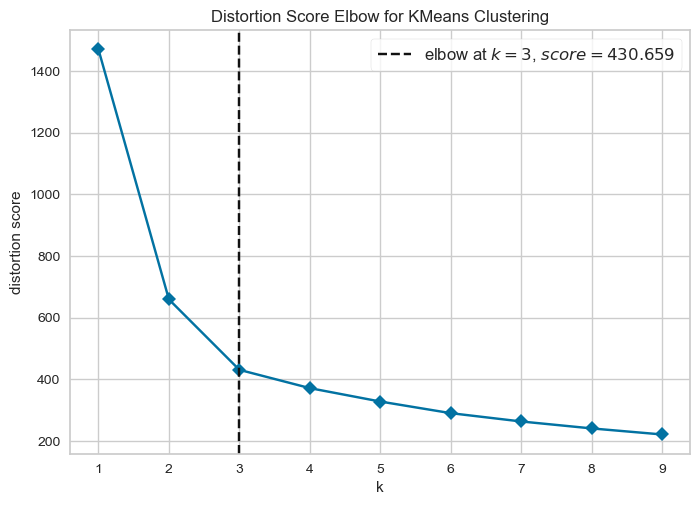

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, n_init=10, random_state=54),
                 k=(1, 10), timings=False)

In [61]:
# TODO: Use the elbow method to determine the optimal number of clusters
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

kelbow_visualizer(KMeans(random_state=54, n_init=10), X_scaled, k=(1,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [65]:
# TODO: Implement K-means with the number of clusters determined in the previous step
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=54, n_init=10)
kmeans.fit(X_scaled)

X['clusters'] = kmeans.labels_
X['clusters'] = X['clusters'].astype('category') #makes seaborn use qualitative color palette

C:\Users\bains\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [70]:
# TODO: Calculate the three different validation metrics
sil_avg = silhouette_score(X_scaled, kmeans.labels_)
cal_H = calinski_harabasz_score(X_scaled, kmeans.labels_)
dav_B = davies_bouldin_score(X_scaled, kmeans.labels_)

# Printing the validation metrics
print("Silhouette Score: {:.5f}".format(sil_avg))
print("Calinski-Harabasz Score: {:.5f}".format(cal_H))
print("Davies-Bouldin Score: {:.5f}".format(dav_B))

Silhouette Score: 0.40073
Calinski-Harabasz Score: 249.78417
Davies-Bouldin Score: 0.92787


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

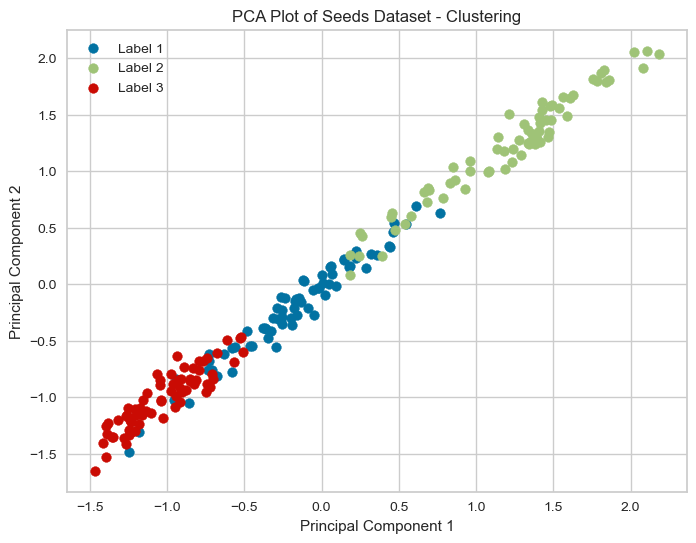

In [100]:
# TODO: Plot clustering results
plt.figure(figsize=(8, 6))
for label in np.unique(y):
    indices = np.where(y == label)
    plt.scatter(X_scaled[indices, 0], X_scaled[indices, 1], label=f'Label {label}')

plt.title('PCA Plot of Seeds Dataset - Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [80]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA().fit(X_scaled)
desired_variance_ratio = 0.95 # threshold desired 
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= desired_variance_ratio) + 1
n_components

3

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [90]:
# TODO: Use PCA to transform the data
pca_model = PCA(n_components=3)
X_pca = pca_model.fit_transform(X_scaled)


In [91]:
# TODO: Implement K-means with the transformed data
kmeans_pca = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans_pca.fit(X_pca)

C:\Users\bains\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=0)

In [93]:
# TODO: Calculate the three different validation metrics
sil_avg_pca = silhouette_score(X_pca, kmeans_pca.labels_)
cal_H_pca = calinski_harabasz_score(X_pca, kmeans_pca.labels_)
dav_B_pca = davies_bouldin_score(X_pca, kmeans_pca.labels_)

# Printing the validation metrics
print("Silhouette Score: {:.5f}".format(sil_avg_pca))
print("Calinski-Harabasz Score: {:.5f}".format(cal_H_pca))
print("Davies-Bouldin Score: {:.5f}".format(dav_B_pca))

Silhouette Score: 0.41008
Calinski-Harabasz Score: 260.28851
Davies-Bouldin Score: 0.90307


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [101]:
# TODO: Display results
# Create a dictionary of lists
data = {'Scores': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
        'Original': [sil_avg, cal_H, dav_B],
       'Post-PCA': [sil_avg_pca, cal_H_pca, dav_B_pca]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df.set_index('Scores', inplace=True)
print(df)

                           Original    Post-PCA
Scores                                         
Silhouette Score           0.400727    0.410082
Calinski-Harabasz Score  249.784175  260.288507
Davies-Bouldin Score       0.927871    0.903069


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
2. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
3. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


1. The optimal number of clusters of 3 makes sense because we know we have 3 kernals in the dataset
2. My PCA plot in Part 2 is different from the first part but there are some similarities. The 3 different labels are still generally clustered together still and they are in the same order as the first part (Label 3, Label 1, Label 2 from Left to Right)
3. I used 3 components for the PCA analysis, and given the dataframe above that compares the scores, we can see that we got a slightly higher silhouette score and calinkski score, so the clusters were a little denser and more defined, but the davies-bouldin score dropped slightly with the PCA model so that inidicates there is quite a bit of similarity between the clusters, which is pretty obvious in the clustering plot from Part 2 Step 1. Overall, I think PCA did improve the results slightly.  
Silhouette Score: higher score means the clusters are dense and well separated
Calinkski Hasbasz Score: higher score means more defined clusters
Davies-Bouldin Score: average 'similarity' between clusters, distance between clusters

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

1. Code was sourced from previous in class examples and lab examples, as well as the code from the previous part 
2. I completed the steps in order
3. I asked chatGPT what the memory leak error was but then decided to just leave it as is 
4. I had could not figure out if my plot for part 2 where the clusters make a perfect is correct but then comparing it a little bit more to the previous part, I didn't think it was that crazy so I left it as is 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.



The assignment was pretty straight forward which helps reinforce concepts learnt throughout the lectures and labs. I did find PCA confusing but using it for this assignment, it is slightly clearer and can see how it can be a valuable tool. 